In [60]:
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

In [73]:
Xc = X-np.mean(X, axis=0)

In [74]:
S = np.cov(Xc.T)

In [75]:
np.corrcoef(Xc.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [13]:
FactorAnalysis?

In [76]:
U,D,_ = np.linalg.svd(S)

In [77]:
U

array([[-0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [ 0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [-0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [-0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [78]:
D

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [28]:
W = U@np.diag(np.sqrt(D))
print(W)

[[-0.743108   -0.32344628  0.16277024  0.04870686]
 [ 0.17380102 -0.35968937 -0.16721151 -0.04936083]
 [-1.76154511  0.08540619 -0.02132015 -0.07408051]
 [-0.73673893  0.03718318 -0.15264701  0.11635429]]


In [29]:
W@W.T-S

array([[ 8.88178420e-16, -1.38777878e-16,  1.55431223e-15,
         5.55111512e-16],
       [-1.38777878e-16, -1.38777878e-16,  0.00000000e+00,
         1.11022302e-16],
       [ 1.55431223e-15,  0.00000000e+00,  1.33226763e-15,
         6.66133815e-16],
       [ 5.55111512e-16,  1.11022302e-16,  6.66133815e-16,
         1.11022302e-16]])

In [80]:
W1 = U[:,:2]@np.diag(np.sqrt(D[:2]))
print(W1.shape)

(4, 2)


In [82]:
W1@W1.T-S

array([[-0.02886651,  0.02962127,  0.00707852,  0.01917914],
       [ 0.02962127, -0.03039618, -0.00722165, -0.01978099],
       [ 0.00707852, -0.00722165, -0.00594247,  0.00536513],
       [ 0.01917914, -0.01978099,  0.00536513, -0.03683943]])

In [90]:
trans = FactorAnalysis(n_components=2, random_state=1)

In [91]:
X_t = trans.fit_transform(X)

In [92]:
X_t

array([[-1.32761727e+00, -5.61310764e-01],
       [-1.33763854e+00, -2.79764907e-03],
       [-1.40281483e+00,  3.06349492e-01],
       [-1.30104274e+00,  7.18826835e-01],
       [-1.33342439e+00, -3.64588985e-01],
       [-1.14667134e+00, -1.04228193e+00],
       [-1.35307178e+00,  5.74473558e-01],
       [-1.27940722e+00, -2.33129838e-01],
       [-1.36530876e+00,  1.12229944e+00],
       [-1.28651978e+00,  4.72301660e-02],
       [-1.25777170e+00, -1.18508651e+00],
       [-1.23700429e+00,  2.91772867e-01],
       [-1.34543381e+00,  2.06818259e-01],
       [-1.53401771e+00,  1.05544473e+00],
       [-1.39682229e+00, -2.38993243e+00],
       [-1.23819458e+00, -1.98969103e+00],
       [-1.36091949e+00, -1.37946760e+00],
       [-1.32540156e+00, -5.50623528e-01],
       [-1.13192081e+00, -1.69029724e+00],
       [-1.27252223e+00, -5.37071207e-01],
       [-1.14996491e+00, -9.45749580e-01],
       [-1.27007895e+00, -5.02802605e-01],
       [-1.56999078e+00,  1.79437924e-01],
       [-1.

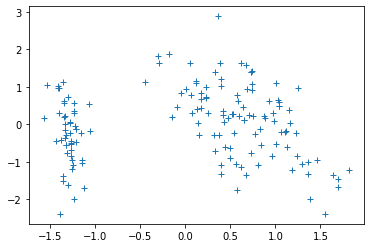

In [62]:
plt.plot(X_t[:,0],X_t[:,1],'+')

In [83]:
X_t2 = Xc@W1

In [84]:
X_t2

array([[ 5.51928399e+00, -1.57340267e-01],
       [ 5.58100509e+00,  8.71936758e-02],
       [ 5.94054140e+00,  7.14044395e-02],
       [ 5.64516308e+00,  1.56799242e-01],
       [ 5.61097490e+00, -1.60964576e-01],
       [ 4.69006068e+00, -3.65191409e-01],
       [ 5.79978400e+00,  4.40701298e-02],
       [ 5.40006018e+00, -8.04860825e-02],
       [ 5.93517899e+00,  2.84885755e-01],
       [ 5.49590457e+00,  5.60470398e-02],
       [ 5.15495729e+00, -3.17771408e-01],
       [ 5.37252727e+00, -7.25620707e-03],
       [ 5.72898978e+00,  1.15819987e-01],
       [ 6.62900731e+00,  2.51921272e-01],
       [ 5.43831792e+00, -5.80678589e-01],
       [ 4.90633781e+00, -6.59151218e-01],
       [ 5.39467873e+00, -3.99353884e-01],
       [ 5.44561010e+00, -1.53621949e-01],
       [ 4.52342207e+00, -4.29974675e-01],
       [ 5.32159590e+00, -2.52988142e-01],
       [ 4.75050796e+00, -1.92783359e-01],
       [ 5.23054190e+00, -2.13300887e-01],
       [ 6.61283614e+00, -6.57485370e-02],
       [ 4.

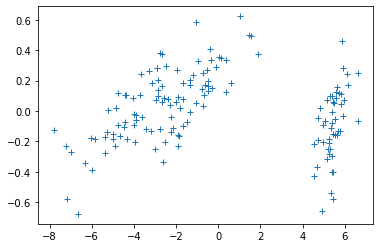

In [87]:
plt.plot(X_t2[:,0],X_t2[:,1],'+')

In [88]:
W1

array([[-0.743108  , -0.32344628],
       [ 0.17380102, -0.35968937],
       [-1.76154511,  0.08540619],
       [-0.73673893,  0.03718318]])

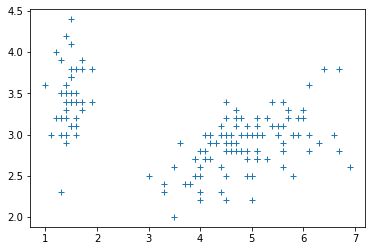

In [89]:
plt.plot(X[:,2],X[:,1],'+')

In [97]:
Psi = np.diag(S-W@W.T)
Ginv = (np.identity(4) + W.T@np.diag(1./Psi)@W)
Z = np.linalg.solve(Ginv, W.T@np.diag(1./Psi)@Xc.T)

In [98]:
Z.shape

(4, 150)

In [100]:
Z = Z.T

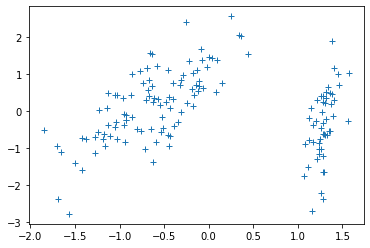

In [101]:
plt.plot(Z[:,0],Z[:,1],'+')

In [104]:
trans.get_covariance()

array([[ 0.68126364, -0.04284633,  1.26570894,  0.51508603],
       [-0.04284633,  0.1886676 , -0.32646537, -0.14309414],
       [ 1.26570894, -0.32646537,  3.09553209,  1.2866423 ],
       [ 0.51508603, -0.14309414,  1.2866423 ,  0.57713221]])

In [108]:
trans.fit_transform?

In [110]:
np.corrcoef(X_t.T)

array([[1.00000000e+00, 5.70609201e-14],
       [5.70609201e-14, 1.00000000e+00]])